## Chess Match Analysis

Primary Purpose: Determine the significance of ELO when it comes to predicting the outcome of a chess match

Secondary purposes:


*   Analyze the effect of time on significance of ELO
*   Display correlations between ELO and opening sequence 



# Organzing and Summarizing Data

In [ ]:
# Load libraries
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

import seaborn as sns
sns.set(style="whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create header and display dataframe
col_names = ["WhiteELO", "BlackELO", "Winner", "Time", "Result", "Opening"]
df = pd.read_csv("ChessMatchDataset.csv", header=0, names=col_names)
print(df)

      WhiteELO  BlackELO Winner   Time     Result Opening
0         1500      1191  white   15+2  outoftime     D10
1         1322      1261  black   5+10     resign     B00
2         1496      1500  white   5+10       mate     C20
3         1439      1454  white   20+0       mate     D02
4         1523      1469  white   30+3       mate     C41
...        ...       ...    ...    ...        ...     ...
4995      2220      2157  white  15+10     resign     A84
4996      2157      1380  white    5+5       mate     C42
4997      2157      1569  white    5+5       mate     C78
4998      2157      2000  white    5+5     resign     B01
4999      2173      2287  black    9+0     resign     B20

[5000 rows x 6 columns]


In [3]:
# Insert new columns

# Generate new column for difference in ELO (White - Black)
column_difference = df["WhiteELO"] - df["BlackELO"]
df.insert (2, "DifferenceELO", column_difference)
# Generate new column which equals 1 in cases of white win and 0 in cases of black win or draw
df.insert (7, "WinOrLoss", 0)
count = 0
for line in df["Winner"]:
  count += 1
  if line == "white":
    df["WinOrLoss"][count-1] = 1
# Generate new column which equals 1 in cases of draw and 0 in cases of white or black win
df.insert (8, "Draw", 0)
count = 0
for line in df["Winner"]:
  count += 1
  if line == "draw":
    df["Draw"][count-1] = 1
print(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


      WhiteELO  BlackELO  DifferenceELO  ... Opening WinOrLoss Draw
0         1500      1191            309  ...     D10         1    0
1         1322      1261             61  ...     B00         0    0
2         1496      1500             -4  ...     C20         1    0
3         1439      1454            -15  ...     D02         1    0
4         1523      1469             54  ...     C41         1    0
...        ...       ...            ...  ...     ...       ...  ...
4995      2220      2157             63  ...     A84         1    0
4996      2157      1380            777  ...     C42         1    0
4997      2157      1569            588  ...     C78         1    0
4998      2157      2000            157  ...     B01         1    0
4999      2173      2287           -114  ...     B20         0    0

[5000 rows x 9 columns]


In [4]:
# Check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WhiteELO       5000 non-null   int64 
 1   BlackELO       5000 non-null   int64 
 2   DifferenceELO  5000 non-null   int64 
 3   Winner         5000 non-null   object
 4   Time           5000 non-null   object
 5   Result         5000 non-null   object
 6   Opening        5000 non-null   object
 7   WinOrLoss      5000 non-null   int64 
 8   Draw           5000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 351.7+ KB


In [5]:
# Display descriptive statistics
df.describe()

,WhiteELO,BlackELO,DifferenceELO,WinOrLoss,Draw
count,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,1546.816200,1543.28840,3.52780,0.493000,0.046600
std,298.826043,303.78815,255.12811,0.500001,0.210802
min,784.000000,791.00000,-1223.00000,0.000000,0.000000
25%,1331.000000,1327.00000,-112.00000,0.000000,0.000000
50%,1501.000000,1500.00000,0.00000,0.000000,0.000000
75%,1744.000000,1744.00000,113.25000,1.000000,0.000000
max,2621.000000,2723.00000,1471.00000,1.000000,1.000000


In [6]:
# Summarize non-integer variables 
df.Winner.value_counts()

white    2465
black    2302
draw      233
Name: Winner, dtype: int64

In [7]:
df.Time.value_counts()
# The number before the + signifies the starting time in minutes per player
# The number after the + signifies the added time after each move in seconds per player

10+0      2190
15+15      283
15+0       279
5+5        175
10+5       142
          ... 
10+180       1
60+30        1
11+8         1
30+25        1
12+10        1
Name: Time, Length: 209, dtype: int64

In [8]:
df.Result.value_counts()

resign       2703
mate         1710
outoftime     368
draw          219
Name: Result, dtype: int64

In [27]:
df.Opening.value_counts()
# These are ECO values which represent a specific opening sequence consisiting of moves by both players
# link to ECO code database: https://www.365chess.com/eco.php 

A00    243
B01    230
C00    212
D00    203
C20    192
      ... 
B88      1
D70      1
E44      1
A33      1
E01      1
Name: Opening, Length: 276, dtype: int64

# Visualizing Data

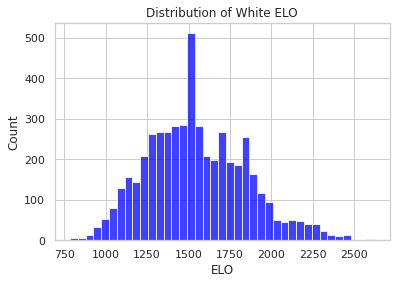

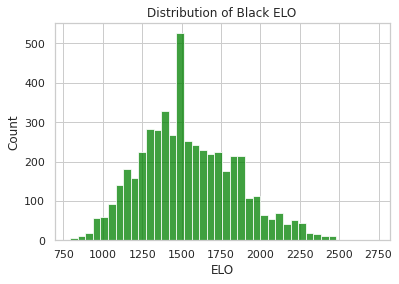

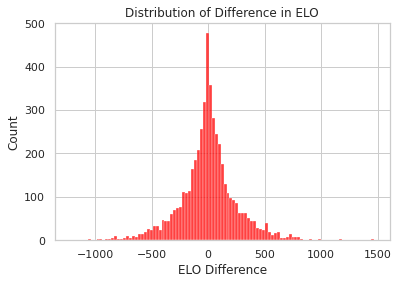

In [10]:
# Distribution of ELO and difference in ELO
sns.histplot(df["WhiteELO"], color = "blue")
plt.xlabel("ELO")
plt.ylabel("Count")
plt.title("Distribution of White ELO")
plt.show()
sns.histplot(df["BlackELO"], color = "green")
plt.xlabel("ELO")
plt.ylabel("Count")
plt.title("Distribution of Black ELO")
plt.show()
sns.histplot(df["DifferenceELO"], color = "red")
plt.xlabel("ELO Difference")
plt.ylabel("Count")
plt.title("Distribution of Difference in ELO")
plt.show()

# ELO Difference and Result Analysis

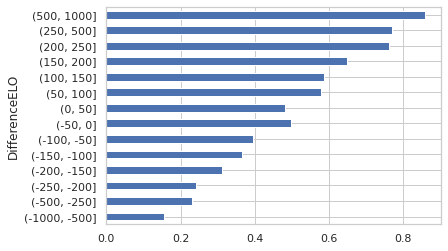

DifferenceELO
(-1000, -500]    0.156250
(-500, -250]     0.231111
(-250, -200]     0.241935
(-200, -150]     0.311321
(-150, -100]     0.366366
(-100, -50]      0.395402
(-50, 0]         0.498630
(0, 50]          0.482143
(50, 100]        0.577825
(100, 150]       0.585670
(150, 200]       0.648515
(200, 250]       0.762431
(250, 500]       0.769737
(500, 1000]      0.859551
Name: WinOrLoss, dtype: float64

In [22]:
# Find win percentages based on ranges of difference in ELO
bins = pd.cut(df["DifferenceELO"], [-1000, -500, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 500, 1000])
df.groupby(bins)["WinOrLoss"].mean().plot.barh()
plt.show()
df.groupby(bins)["WinOrLoss"].mean()

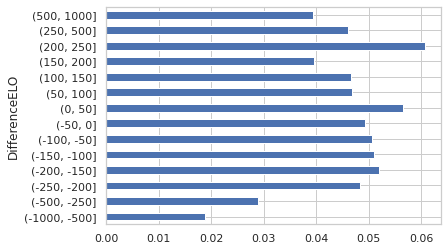

DifferenceELO
(-1000, -500]    0.018750
(-500, -250]     0.028889
(-250, -200]     0.048387
(-200, -150]     0.051887
(-150, -100]     0.051051
(-100, -50]      0.050575
(-50, 0]         0.049315
(0, 50]          0.056548
(50, 100]        0.046908
(100, 150]       0.046729
(150, 200]       0.039604
(200, 250]       0.060773
(250, 500]       0.046053
(500, 1000]      0.039326
Name: Draw, dtype: float64

In [12]:
# Find draw percentages based on ranges of difference in ELO
bins = pd.cut(df["DifferenceELO"], [-1000, -500, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 500, 1000])
df.groupby(bins)["Draw"].mean().plot.barh()
plt.show()
df.groupby(bins)["Draw"].mean()

# Time Effect on Outcome Variability

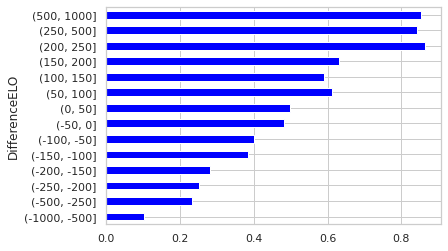

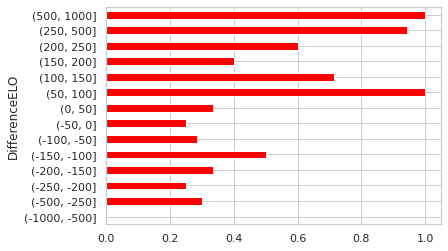

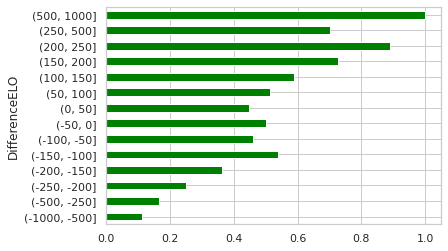

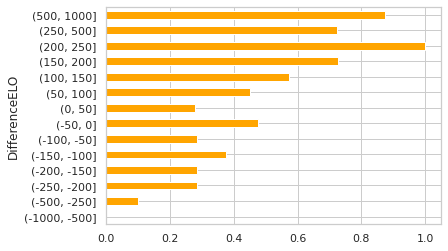

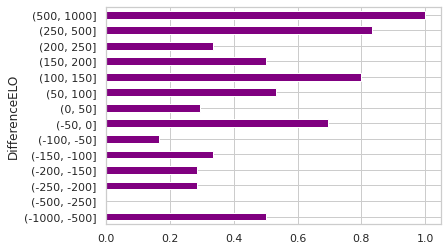

In [13]:
df10_0 = df.query("Time == '10+0'")
df15_15 = df.query("Time == '15+5'")
df15_0 = df.query("Time == '15+0'")
df5_5 = df.query("Time == '5+5'")
df10_5 = df.query("Time == '10+5'")
bins10_0 = pd.cut(df10_0["DifferenceELO"], [-1000, -500, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 500, 1000])
df10_0.groupby(bins10_0)["WinOrLoss"].mean().plot.barh(color = "blue")
plt.show()
bins15_15 = pd.cut(df15_15["DifferenceELO"], [-1000, -500, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 500, 1000])
df15_15.groupby(bins15_15)["WinOrLoss"].mean().plot.barh(color = "red")
plt.show()
bins15_0 = pd.cut(df15_0["DifferenceELO"], [-1000, -500, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 500, 1000])
df15_0.groupby(bins15_0)["WinOrLoss"].mean().plot.barh(color = "green")
plt.show()
bins5_5 = pd.cut(df5_5["DifferenceELO"], [-1000, -500, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 500, 1000])
df5_5.groupby(bins5_5)["WinOrLoss"].mean().plot.barh(color = "orange")
plt.show()
bins10_5 = pd.cut(df10_5["DifferenceELO"], [-1000, -500, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 500, 1000])
df10_5.groupby(bins10_5)["WinOrLoss"].mean().plot.barh(color = "purple")
plt.show()

# ELO and Opening Sequence Correlation

In [14]:
# Generate new collumn for total ELO 
column_sum = df["WhiteELO"] + df["BlackELO"]
df.insert (9, "TotalELO", column_sum)

In [18]:
# Run OLS regression
result = sm.ols(formula="TotalELO ~ Opening", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalELO   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4.422
Date:                Thu, 14 Jan 2021   Prob (F-statistic):          4.12e-101
Time:                        14:47:10   Log-Likelihood:                -38034.
No. Observations:                5000   AIC:                         7.662e+04
Df Residuals:                    4724   BIC:                         7.842e+04
Df Model:                         275                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2814.4115     32.130     87.

# Findings



*   Initial observations
    *   White has a clear advantage in the game

        *   49.3% win percentage vs 46% for black 
        *   Asymmetrical distribution for difference in ELO and draw percentage

    *   54% matches end in a resignation while only 34.2% end in checkmate
    *   Draws occur in roughly 4.5% of games with limited variablity based on difference in ELO





*   Significance of ELO
    *   When the difference in ELO was ± 50 there was no significant difference in win percentage

    *   However, beyond this range there was a clear trend
        *   White acheived an average win percentage of roughly 60% after a 100 point advantage in ELO, 75% after a 200 point advantage, and 85% after a 500 point advanage. 
    * Although the correlation is strong, an advantage in ELO was shown to be far from a guarenteed victory 





*   Time and ELO
    *   Although less time may at first appear to even the playing field offering less time to think, it seems to actually add to the skill barrier and strengthen the significance of ELO

        *   The 5+5, 10+0, and 15+0 matches displayed much stronger correlation with ELO than the 15+15 and 10+5 matches
            
            
           *   Uneven distribution of games resulted in low sample sizes which may affect results 



*   Opening Sequence and ELO
    *   Many of the opening sequences had strong correlations with total ELO

        *   The openings associated with the highest total points of ELO were C81, A71, and E53
        *   The openings associated with the lowest total points of ELO were not statisitcally significant

            *   Furthermore, of the openings with statistically significant coefficients, there were many openings associated with similar total points of ELO at the bottom of the range 













